Soal: Buatlah sebuah file notebook (EDA_HouseMarket.ipynb) dan ikuti panduan Exploratory Data Analysis berikut:

Untuk feature/column Landsize, Distance, & Price, hitung dan beri penjelasan (insight) terkait:

Titik Pusat Data (Central Tendency)
Persebaran Data (Dispersion)
Distribusi Data (Distribution)
Carilah data outlier dan beri penjelasan (insight) pada feature/column Landsize & Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column Landsize & YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

Tampilkan perkembangan rata-rata harga (price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import learning_curve, GridSearchCV
from scipy.stats import norm
from scipy.stats import zscore
from sklearn.neighbors import KernelDensity
import matplotlib.gridspec as gridspec
from scipy import stats

In [17]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [18]:
dfn = df[['Landsize', 'Distance', 'Price']]
dfn.head()

,Landsize,Distance,Price
0,202.0,2.5,1480000.0
1,156.0,2.5,1035000.0
2,134.0,2.5,1465000.0
3,94.0,2.5,850000.0
4,120.0,2.5,1600000.0


In [19]:
dfn.dtypes

Landsize    float64
Distance    float64
Price       float64
dtype: object

In [20]:
desc = dfn.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
Landsize,13580.0,5.584161e+02,3990.669241,0.0,177.0,440.0,651.0,433014.0
Distance,13580.0,1.013778e+01,5.868725,0.0,6.1,9.2,13.0,48.1
Price,13580.0,1.075684e+06,639310.724296,85000.0,650000.0,903000.0,1330000.0,9000000.0


In [21]:
desc['Mode'] = dfn.select_dtypes(include=[np.number]).mode().T
desc['Range'] = desc['max'] - desc['min']
desc['IQR'] = desc['75%'] - desc['25%']
desc['variance'] = dfn.var().tolist()
desc

,count,mean,std,min,25%,50%,75%,max,Mode,Range,IQR,variance
Landsize,13580.0,5.584161e+02,3990.669241,0.0,177.0,440.0,651.0,433014.0,0.0,433014.0,474.0,1.592544e+07
Distance,13580.0,1.013778e+01,5.868725,0.0,6.1,9.2,13.0,48.1,11.2,48.1,6.9,3.444193e+01
Price,13580.0,1.075684e+06,639310.724296,85000.0,650000.0,903000.0,1330000.0,9000000.0,1100000.0,8915000.0,680000.0,4.087182e+11


**Berdasarkan data di atas berikut penjelasannya:** 

<span style='color:Indianred'>*1. Mean, Median, dan Modus*</span>

- **Mean : Nilai rata-rata pada kolom Landsize, Distance, dan Price masing-masing berurutan adalah: 5.584161e+02, 1.013778e+01, 1.075684e+06**
- yang berarti:
1. untuk landsize, rata-rata ukuran tanah pada House Market adalah seluas sekitar 55m2
2. untuk Distance, rata-rata jarak pada setiap House Market adalah sekitar 1m2
3. Untuk Price, rata-rata harga jual rumah adalah sebesar USD 107.568


- **Median : Nilai tengah pada kolom Landsize, Distance, dan Price masing-masing berurutan adalah: 440, 9.2, USD9030000**
- yang berarti:
1. untuk landsize, jika data diurutkan dari ukuran tanah terkecil sampai terbesar, nilai tengah ukuran tanah pada House Market adalah  seluas sekitar 440m2
2. untuk Distance, jika data diurutkan dari jarak rumah terkecil sampai terbesar, nilai tengah distance pada House Market adalah 9.2m2
3. untuk Price, jika data diurutkan dari range harga rumah terkecil sampai terbesar, nilai tengah harga rumah adalah sebesar USD9030000
    
    
- **Modus :Nilai Modus pada kolom Landsize, Distance, dan Price masing-masing berurutan adalah: 0, 11.2, 1100000USD**
- yang berarti:
1. untuk landsize, values yang paling banyak muncul adalah rumah dengan ukuran tanah null value(0)
2. untuk Distance, values yang paling banyak muncul adalah rumah dengan jarak 11.2m2
3. untuk Price, values yang paling banyak muncul adalah rumah dengan harga 1100000USD

<span style='color:Indianred'>*2. Range, Q1, Q3, dan IQR*</span>

- **Range : Selisih nilai terbesar dan terkcil pada kolom Landsize, Distance, dan Price masing-masing berurutan adalah: 433014.0, 48.1, 8915000USD**
- yang berarti:
1. untuk landsize, range ukuran tanah pada House Market adalah seluas 433014m2
2. untuk Distance, range jarak pada setiap House Market adalah sekitar 48.1m2
3. Untuk Price, range harga jual rumah adalah sebesar USD 8915000

- **Q1 : Nilai tengah dari 25% jumlah data (di bawah nilai Median (50%)) pada kolom Landsize, Distance, dan Price masing-masing berurutan adalah: 177, 6.1, 650000USD**
- yang berarti:
1. untuk landsize, Quartil pertama ukuran tanah pada House Market adalah seluas 177m2
2. untuk Distance, Quartil pertama jarak pada setiap House Market adalah sekitar 6.1m2
3. Untuk Price, Quartil pertama harga jual rumah adalah sebesar USD 650000

- **Q3 : Nilai tengah dari 75% jumlah data, (di atas nilai Median (50%)) pada kolom Landsize, Distance, dan Price masing-masing berurutan adalah: 651, 13, 1330000USD**
- yang berarti:
1. untuk landsize, Quartil ketiga ukuran tanah pada House Market adalah seluas 651m2
2. untuk Distance, Quartil ketiga jarak pada setiap House Market adalah sekitar 13m2
3. Untuk Price, Quartil ketiga harga jual rumah adalah sebesar USD 1330000

- **IQR : Jumlah nilai dimana 50% dari jumlah data pada kolom Landsize, Distance, dan Price masing-masing berurutan adalah: 474, 6.9, 680000USD**
- yang berarti:
1. untuk landsize, IQR ukuran tanah pada House Market adalah seluas 474m2
2. untuk Distance, IQR jarak pada setiap House Market adalah sekitar 6.9m2
3. Untuk Price, IQR harga jual rumah adalah sebesar USD 680000

<span style='color:Indianred'>*3. Standard Deviasi dan Variance*</span>

- **Standard Deviasi : Merupakan alat pengukur seberapa jauh nilai mean dari dataset, dan dimanfaatkan untuk melihat apakah sampel data yang diambil mewakili seluruh populasi**
- Masing - masing nilai standar deviasi pada kolom Landsize, Distance, dan Price masing-masing berurutan adalah: 13990.669241, 5.868725, 639310.724296.
- Berdasarkan hasil standar deviasi ketiganya tersebut, terlihat jelas jika standar deviasinya cukup jauh menyimpang dari rata-ratanya
- Sehingga, dapat diartikan ketiga data tersebut memiliki sebaran data yang sangat beragam di dalam House Market.

- **Variance : Nilai Keragaman dari suatu data**
- Masing - masing nilai varians pada kolom Landsize, Distance, dan Price masing-masing berurutan adalah: 1.592544e+07, 3.444193e+01, 4.087182e+11.
- Berdasarkan hasil varians ketiganya tersebut, terlihat jelas jauh menyimpang dari nilai rata-ratanya
- Sehingga, dapat diartikan ketiga data tersebut memiliki sebaran data yang sangat beragam di dalam House Market.


In [11]:
iqr = desc['75%'] - desc['25%']
bb = desc['25%'] - (1.5*iqr)
ba = desc['75%'] + (1.5*iqr)

outlier1 = [i for i in df['Landsize'] if i < bb['Landsize'] or i > ba['Landsize']]
outlier2 = [i for i in df['Distance'] if i < bb['Distance'].item() or i > ba['Distance'].item()]
outlier3 = [i for i in df['Price'] if i < bb['Price'].item() or i > ba['Price'].item()]

print('Outlier Landsize = ' f'{outlier1}\n')
print('Outlier Distance = ' f'{outlier2}\n')
print('Outlier Price = ' f'{outlier3}\n')

Outlier Landsize = [4290.0, 1581.0, 2113.0, 1491.0, 2471.0, 1957.0, 1472.0, 1801.0, 2051.0, 1468.0, 1437.0, 1611.0, 1364.0, 75100.0, 4931.0, 1572.0, 1561.0, 4668.0, 4676.0, 2120.0, 1393.0, 2886.0, 15900.0, 2773.0, 3701.0, 1777.0, 1484.0, 1764.0, 1966.0, 2381.0, 2925.0, 1622.0, 1547.0, 10100.0, 1658.0, 2782.0, 4332.0, 2778.0, 4296.0, 4296.0, 4296.0, 2077.0, 2794.0, 8680.0, 1783.0, 1485.0, 3056.0, 1996.0, 1402.0, 1504.0, 3414.0, 1585.0, 1997.0, 3132.0, 1568.0, 3194.0, 3977.0, 4267.0, 4440.0, 3448.0, 3957.0, 2136.0, 1972.0, 15100.0, 5661.0, 3967.0, 1396.0, 37000.0, 4977.0, 3014.0, 3014.0, 4230.0, 1414.0, 4051.0, 1751.0, 1388.0, 2026.0, 2187.0, 1981.0, 1660.0, 2522.0, 1588.0, 2300.0, 1882.0, 1390.0, 2469.0, 2427.0, 2488.0, 2431.0, 2401.0, 2193.0, 21700.0, 2166.0, 2166.0, 2166.0, 6866.0, 5042.0, 1768.0, 1958.0, 8216.0, 3037.0, 1485.0, 4679.0, 41400.0, 8223.0, 1725.0, 2571.0, 2740.0, 7455.0, 8223.0, 3516.0, 1850.0, 1613.0, 2325.0, 2143.0, 14500.0, 17200.0, 1369.0, 1424.0, 2122.0, 6111.0, 172

In [33]:
# Batas Bawah
def outliers(data):
    q1 = data.describe()['25%']
    q3 = data.describe()['75%']
    IQR = q3 - q1
    BB = q1 - 1.5*IQR
    BB
    
# Batas Atas
    q1 = data.describe()['25%']
    q3 = data.describe()['75%']
    IQR = q3 - q1
    BA = q3 + 1.5*IQR
    BA
    
# IQR
    IQR

# Outliers
    q1 = data.describe()['25%']
    q2 = data.describe()['50%']
    q3 = data.describe()['75%']
    IQR = q3 - q1
    outlier = []
    for i in data:
        if i < BB or i > BA:
            outlier.append(i)
    outlier
    
# Total Outlier
    total = len(outlier)

    print('Batas Bawah = ' f'{BB}\n')
    print('Batas Atas = ' f'{BA}\n')
    print('IQR = ' f'{IQR}\n')
    print('Nilai Outlier = ' f'{outlier}\n')
    print('Total Outliers = ' f'{total}')

In [13]:
outliers(dfn['Landsize'])

Batas Bawah = -534.0

Batas Atas = 1362.0

IQR = 474.0

Nilai Outlier = [4290.0, 1581.0, 2113.0, 1491.0, 2471.0, 1957.0, 1472.0, 1801.0, 2051.0, 1468.0, 1437.0, 1611.0, 1364.0, 75100.0, 4931.0, 1572.0, 1561.0, 4668.0, 4676.0, 2120.0, 1393.0, 2886.0, 15900.0, 2773.0, 3701.0, 1777.0, 1484.0, 1764.0, 1966.0, 2381.0, 2925.0, 1622.0, 1547.0, 10100.0, 1658.0, 2782.0, 4332.0, 2778.0, 4296.0, 4296.0, 4296.0, 2077.0, 2794.0, 8680.0, 1783.0, 1485.0, 3056.0, 1996.0, 1402.0, 1504.0, 3414.0, 1585.0, 1997.0, 3132.0, 1568.0, 3194.0, 3977.0, 4267.0, 4440.0, 3448.0, 3957.0, 2136.0, 1972.0, 15100.0, 5661.0, 3967.0, 1396.0, 37000.0, 4977.0, 3014.0, 3014.0, 4230.0, 1414.0, 4051.0, 1751.0, 1388.0, 2026.0, 2187.0, 1981.0, 1660.0, 2522.0, 1588.0, 2300.0, 1882.0, 1390.0, 2469.0, 2427.0, 2488.0, 2431.0, 2401.0, 2193.0, 21700.0, 2166.0, 2166.0, 2166.0, 6866.0, 5042.0, 1768.0, 1958.0, 8216.0, 3037.0, 1485.0, 4679.0, 41400.0, 8223.0, 1725.0, 2571.0, 2740.0, 7455.0, 8223.0, 3516.0, 1850.0, 1613.0, 2325.0, 2143.0, 

In [14]:
outliers(dfn['Distance'])

Batas Bawah = -4.250000000000002

Batas Atas = 23.35

IQR = 6.9

Nilai Outlier = [35.2, 25.0, 34.7, 24.7, 24.7, 24.7, 25.9, 38.0, 36.9, 38.0, 45.9, 32.3, 45.2, 25.2, 25.2, 31.7, 31.7, 25.9, 25.9, 34.1, 34.1, 23.8, 23.5, 35.4, 34.7, 31.7, 31.7, 31.7, 27.0, 25.5, 25.5, 27.2, 27.0, 25.0, 25.0, 25.0, 25.0, 31.2, 31.2, 31.2, 31.2, 27.0, 27.0, 24.7, 24.7, 24.7, 28.8, 24.8, 24.8, 38.0, 36.9, 32.3, 25.2, 31.7, 29.8, 31.7, 26.5, 26.5, 23.5, 35.4, 31.7, 31.7, 35.2, 34.9, 34.9, 24.7, 24.7, 24.8, 45.9, 32.3, 41.0, 31.7, 29.8, 25.9, 25.9, 26.5, 26.5, 23.5, 23.5, 35.4, 34.7, 31.7, 39.8, 35.2, 31.2, 27.0, 24.7, 38.0, 38.0, 38.0, 38.0, 25.2, 31.7, 29.8, 29.8, 31.6, 34.1, 47.3, 47.4, 23.5, 34.7, 35.4, 34.6, 31.7, 35.2, 35.2, 34.9, 27.1, 24.7, 24.7, 27.7, 27.0, 27.0, 24.8, 24.8, 38.0, 38.0, 38.0, 38.0, 33.3, 25.2, 31.7, 29.8, 31.7, 35.4, 34.6, 31.7, 29.3, 25.5, 37.5, 35.2, 35.2, 25.0, 25.0, 34.9, 34.7, 24.7, 24.7, 24.7, 27.0, 24.8, 24.8, 38.0, 38.0, 32.3, 33.3, 33.3, 26.0, 31.7, 31.7, 29.8, 28.8, 26.5, 

In [15]:
outliers(dfn['Price'])

Batas Bawah = -370000.0

Batas Atas = 2350000.0

IQR = 680000.0

Nilai Outlier = [2850000.0, 2615000.0, 2575000.0, 3010000.0, 2800000.0, 4735000.0, 3755000.0, 2800000.0, 2840000.0, 3625000.0, 3000000.0, 2801000.0, 5525000.0, 2360000.0, 2365000.0, 3660000.0, 3625000.0, 4200000.0, 3512500.0, 2810000.0, 2425000.0, 2650000.0, 2950000.0, 3510000.0, 2752000.0, 2570000.0, 2400000.0, 3250000.0, 4000000.0, 2800000.0, 3180000.0, 3600000.0, 2550000.0, 3270000.0, 2730000.0, 3000000.0, 3400000.0, 2900000.0, 3290000.0, 2665000.0, 2410000.0, 2810000.0, 3401000.0, 4000000.0, 3020000.0, 2950000.0, 2450000.0, 3900000.0, 3230000.0, 3300000.0, 2614000.0, 2550000.0, 3250000.0, 3690000.0, 2575000.0, 2910000.0, 2600000.0, 3000000.0, 2525000.0, 3360000.0, 4000000.0, 2900000.0, 2700000.0, 2435000.0, 2520000.0, 2620000.0, 2770000.0, 4000000.0, 3695000.0, 3700000.0, 3775000.0, 4250000.0, 2905000.0, 2910000.0, 2700000.0, 2600000.0, 2750000.0, 3171000.0, 2400000.0, 3180000.0, 3320000.0, 2800000.0, 4700000.0, 24000

### Berdasarkan data di atas, ketiga kolom (Landsize, Distance, dan Price) memiliki sangat banyak data outliers. Outliers itu sendiri adalah data yang menyimpang terlalu jauh dari data yang lainnya dalam suatu rangkaian data.
**Sehingga, dapat disimpulkan ketiga data (Landsize, Distance, dan Price) tidak terdistribusi normal**

SkewtestResult(statistic=212.046122018087, pvalue=0.0)


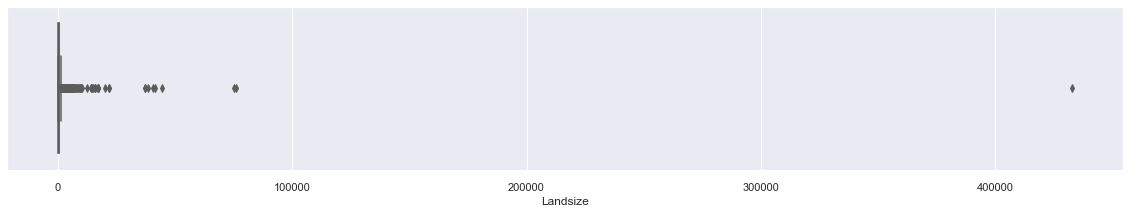

<Figure size 576x648 with 0 Axes>

In [52]:
print(stats.skewtest(dfn['Landsize']))
plt.subplots(figsize=(20,3))
sns.boxplot(x=dfn['Landsize'], color = 'c')
plt.show()
plt.savefig('boxplot_landsize.png')

** Skewness adalah ukuran ketidaksimetrisan dalam distribusi nilai.
Skewness dapat bernilai positif, negatif, dan nol. Apabila nilai sk = 0, maka menunjukkan data berdistribusi normal, sk < 0 kemiringan ke kanan, dan sk > 0 kemiringan ke kiri. 
- Dalam data Landsize, nilai sk = 212.046 adalah artinya merupakan nilai positif, akan tetapi nilainya terlalu jauh dari 0, berarti data tidak terdistribusi normal.
- Hal ini, dapat diartikan persebaran data luas tanah pada perusahaan real estate, cenderung lebih banyak pada luas tanah sebesar  0 - 55m2, untuk mengetahui apakah dengan banyaknya luas tanah dengan ukuran 0 - 55m2 yang terjual, tentu sangat tergantung oleh berbagai faktor (lokasi, pemasaran, harga tanah/rumah, promosi, dan daya beli masyarakat itu sendiri).
- Sehingga, saran untuk perusahaan Real Estate, lebih baik melakukan pendistribusian penjualan perumahan dengan luas tanah yang bervariasi (tergantung hasil riset yang dilakukan oleh perusahaan), agar persebaran data penjualan perumahan terdistribusi dengan baik, tidak hanya di wilayah perkotaan, namun juga harus menjangkau  daerah-daerah. Sehingga, persebaran penduduk pun juga dapat terdistribusi dengan baik.

SkewtestResult(statistic=57.04805526564431, pvalue=0.0)


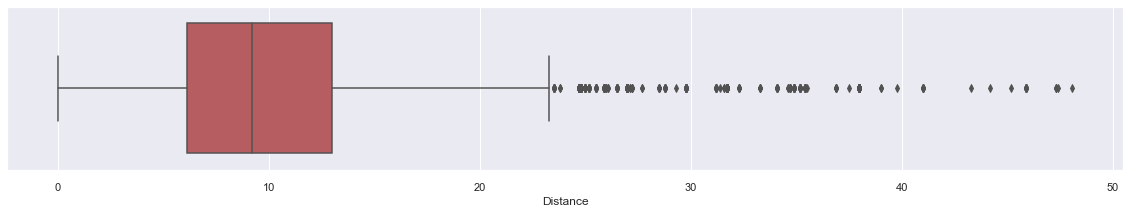

<Figure size 576x648 with 0 Axes>

In [53]:
print(stats.skewtest(dfn['Distance']))
plt.subplots(figsize=(20,3))
sns.boxplot(x=dfn['Distance'], color = 'r')
plt.show()
plt.savefig('boxplot_distance.png')

- Dalam data Distance, nilai sk = 57 adalah artinya merupakan nilai positif, akan tetapi nilainya jauh dari -0.5 - 1 atau -1 - 0.5, berarti data tidak terdistribusi normal.
- Hal ini, dapat diartikan persebaran data Distance/jarak rumah pada perusahaan real estate, cenderung lebih banyak pada jarak sebesar  0 - 1m2.
- Hal ini menunjukkan terdapat cluster/perumahan yang bervariatif tergantung tipe perumahan itu sendiri dan letak lokasinya.
- Sehingga, perusahaan real estate, cenderung lebih untung untuk lebih banyak menjual jarak perumahan sebesar 0 - 1m2 saja.

SkewtestResult(statistic=67.40991681846009, pvalue=0.0)


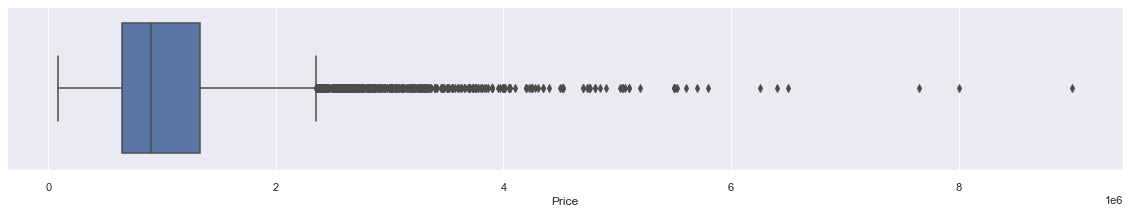

<Figure size 576x648 with 0 Axes>

In [54]:
print(stats.skewtest(dfn['Price']))
plt.subplots(figsize=(20,3))
sns.boxplot(x=dfn['Price'], color = 'b')
plt.show()
plt.savefig('boxplot_price.png')

- SKEWNESS TEST antara 0.5 - 0.5 artinya mendekati tidak ada kemiringan data
- JIKA 1 atau mendekati -1, berarti skewnessnya tinggi
- -1 sampai 0.5 dan 1 sampai (-0,5) berarti ada skewness, tapi tidak terlalu signifikan
- Untuk harga perumahan yang dijual, data penjualan cenderung lebih banyak pada perumahan/cluster yang relatif murah
- Sehingga, saran untuk perusahaan real estate, untuk memperbanyak pembangunan perumahan yang luas tanahnya relatif kecil, jarak antar perumahan juga kecil, dan dengan harga yang relatif terjangkau untuk wilayah kota.

**Dapat disimpulkan ketiga data Landsize, Distance, dan Price memiliki skewness yang sangat tinggi, yang dapat disimpulkan ketiganya tidak terdistribusi normal**


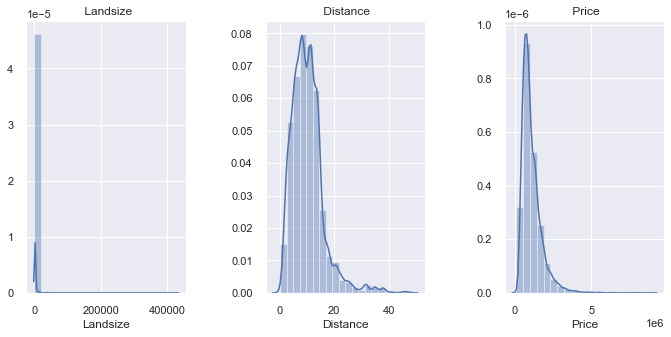

<Figure size 576x648 with 0 Axes>

In [55]:
plt.figure(2, figsize = (20,5))
n = 0
for x in ['Landsize', 'Distance', 'Price']:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()
plt.savefig('kde_land.png')

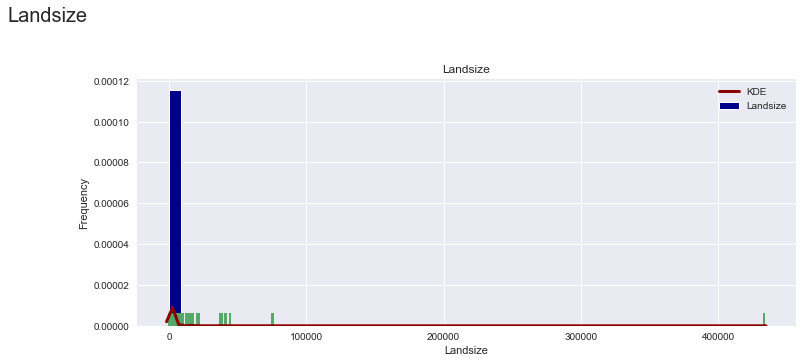

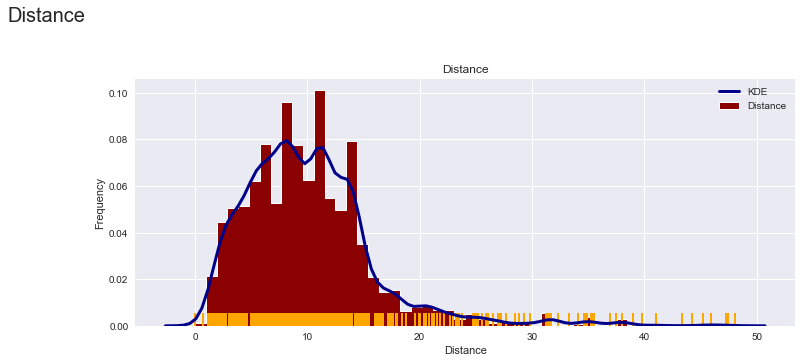

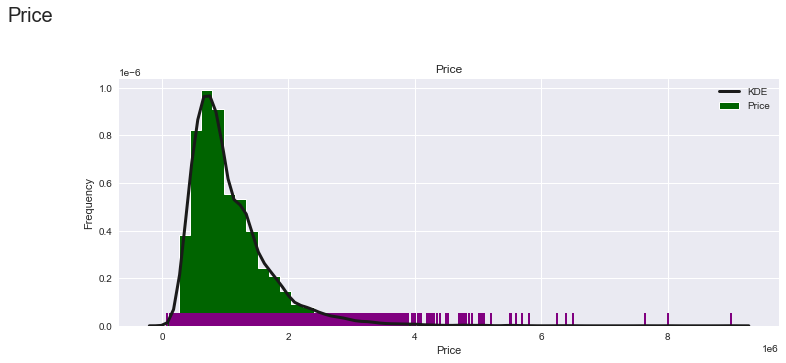

<Figure size 576x396 with 0 Axes>

In [56]:
plt.style.use('seaborn')
fig, (ax1) = plt.subplots(ncols=1,figsize=[26,10])
_ = fig.suptitle('Landsize',size=20)

plt.subplot(222)
ax1 = sns.distplot(df['Landsize'], hist=True, rug=True, kde=True, fit=None,
                   rug_kws={"color": "g", "lw": 2, "label": "rug"},
                   kde_kws={"color": "darkred", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "stepfilled", "linewidth": 1,
                             "alpha": 1, "color": "darkblue"},
                   norm_hist=True, axlabel='Landsize', label='Landsize')
ax1.set(xlabel='Landsize', ylabel='Frequency', title='Landsize')

fig, (ax2) = plt.subplots(ncols=1,figsize=[26, 10])
_ = fig.suptitle("Distance",size=20)
plt.subplot(222)

ax2 = sns.distplot(df['Distance'], hist=True, rug=True, kde=True, fit=None,
                   rug_kws={"color": "orange", "lw": 2, "label": "rug"},
                   kde_kws={"color": "darkblue", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "stepfilled", "linewidth": 1,
                             "alpha": 1, "color": "darkred"},
                   norm_hist=True, axlabel='Distance', label='Distance')
ax2.set(xlabel='Distance', ylabel='Frequency', title='Distance')

fig, (ax3) = plt.subplots(ncols=1,figsize=[26, 10])
_ = fig.suptitle("Price",size=20)
plt.subplot(222)

ax3 = sns.distplot(df['Price'], hist=True, rug=True, kde=True, fit=None,
                   rug_kws={"color": "purple", "lw": 2, "label": "rug"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "stepfilled", "linewidth": 1,
                             "alpha": 1, "color": "darkgreen"},
                   norm_hist=True, axlabel='Price', label='Price')
ax3.set(xlabel='Price', ylabel='Frequency', title='Price')

plt.show()
plt.savefig('kde2')

- Pada plot di atas, dapat disimpulkan:
1. Landsize: Memiliki skewness ke kiri atau Positive Skewness, dimana persebaran data pada Lansdsize di dalam data House Market tidak terdistribusi normal, dan cenderung rata-rata persebaran datanya mendekati nilai minimum di dalam data Landsize itu sendiri
2. Distance : Memiliki skewness ke kiri atau Positive Skewness, dimana persebaran data pada Distance di dalam data House Market tidak terdistribusi normal, dan cenderung rata-rata persebaran datanya mendekati nilai minimum di dalam data Distance itu sendiri
3. Price: Memiliki skewness ke kiri atau Positive Skewness, dimana persebaran data pada Price di dalam data House Market tidak terdistribusi normal, dan cenderung rata-rata persebaran datanya mendekati nilai minimum di dalam data Price itu sendiri

In [26]:
df.groupby('YearBuilt')[['Landsize']]

In [24]:
byBuilt = df.groupby('YearBuilt').count()['Landsize']
byBuilt.head()

YearBuilt
1196.0    1
1830.0    1
1850.0    4
1854.0    1
1856.0    1
Name: Landsize, dtype: int64

In [31]:
dfy = df[['Landsize', 'YearBuilt']]
dfy.head()

,Landsize,YearBuilt
0,202.0,NaN
1,156.0,1900.0
2,134.0,1900.0
3,94.0,NaN
4,120.0,2014.0


In [30]:
dfy.isna().sum()

Landsize        0
YearBuilt    5375
dtype: int64

In [31]:
dfy.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

/Users/sylviaandriani/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
dfy.isna().sum()

Landsize        0
YearBuilt    5375
dtype: int64

In [27]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Landsize   13580 non-null  float64
 1   YearBuilt  8205 non-null   float64
dtypes: float64(2)
memory usage: 212.3 KB


In [29]:
dfy.groupby('YearBuilt')
dfy.head()

,Landsize,YearBuilt
0,202.0,NaN
1,156.0,1900.0
2,134.0,1900.0
3,94.0,NaN
4,120.0,2014.0


In [34]:
outliers(df['YearBuilt'])

Batas Bawah = 1851.5

Batas Atas = 2087.5

IQR = 59.0

Nilai Outlier = [1830.0, 1850.0, 1850.0, 1850.0, 1850.0, 1196.0]

Total Outliers = 6


In [35]:
outliers(df['Landsize'])

Batas Bawah = -534.0

Batas Atas = 1362.0

IQR = 474.0

Nilai Outlier = [4290.0, 1581.0, 2113.0, 1491.0, 2471.0, 1957.0, 1472.0, 1801.0, 2051.0, 1468.0, 1437.0, 1611.0, 1364.0, 75100.0, 4931.0, 1572.0, 1561.0, 4668.0, 4676.0, 2120.0, 1393.0, 2886.0, 15900.0, 2773.0, 3701.0, 1777.0, 1484.0, 1764.0, 1966.0, 2381.0, 2925.0, 1622.0, 1547.0, 10100.0, 1658.0, 2782.0, 4332.0, 2778.0, 4296.0, 4296.0, 4296.0, 2077.0, 2794.0, 8680.0, 1783.0, 1485.0, 3056.0, 1996.0, 1402.0, 1504.0, 3414.0, 1585.0, 1997.0, 3132.0, 1568.0, 3194.0, 3977.0, 4267.0, 4440.0, 3448.0, 3957.0, 2136.0, 1972.0, 15100.0, 5661.0, 3967.0, 1396.0, 37000.0, 4977.0, 3014.0, 3014.0, 4230.0, 1414.0, 4051.0, 1751.0, 1388.0, 2026.0, 2187.0, 1981.0, 1660.0, 2522.0, 1588.0, 2300.0, 1882.0, 1390.0, 2469.0, 2427.0, 2488.0, 2431.0, 2401.0, 2193.0, 21700.0, 2166.0, 2166.0, 2166.0, 6866.0, 5042.0, 1768.0, 1958.0, 8216.0, 3037.0, 1485.0, 4679.0, 41400.0, 8223.0, 1725.0, 2571.0, 2740.0, 7455.0, 8223.0, 3516.0, 1850.0, 1613.0, 2325.0, 2143.0, 

In [41]:
desc2 = dfy.describe().T
desc2

,count,mean,std,min,25%,50%,75%,max
Landsize,8205.0,494.002438,993.221164,0.0,158.0,388.0,640.0,37000.0
YearBuilt,8205.0,1964.684217,37.273762,1196.0,1940.0,1970.0,1999.0,2018.0


In [43]:
desc2['Range'] = desc2['max'] - desc2['min']
desc2['IQR'] = desc2['75%'] - desc2['25%']
desc2['variance'] = dfy.var().tolist()
desc2

,count,mean,std,min,25%,50%,75%,max,Range,IQR,variance
Landsize,8205.0,494.002438,993.221164,0.0,158.0,388.0,640.0,37000.0,37000.0,482.0,986488.280345
YearBuilt,8205.0,1964.684217,37.273762,1196.0,1940.0,1970.0,1999.0,2018.0,822.0,59.0,1389.333350


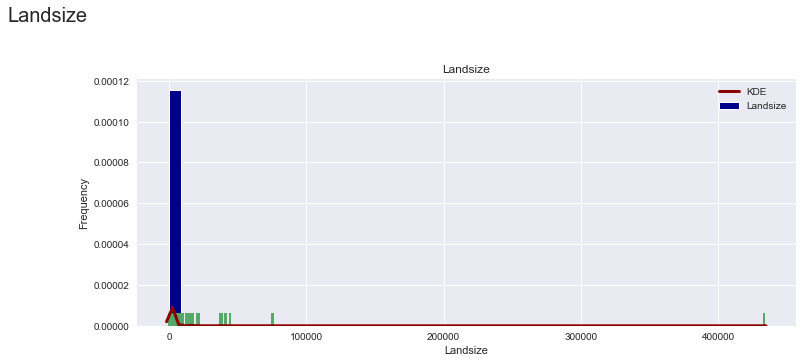

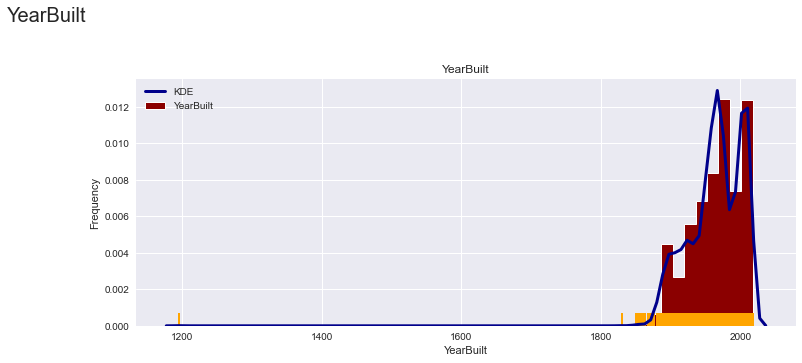

<Figure size 576x396 with 0 Axes>

In [57]:
plt.style.use('seaborn')
fig, (ax1) = plt.subplots(ncols=1,figsize=[26,10])
_ = fig.suptitle('Landsize',size=20)

plt.subplot(222)
ax1 = sns.distplot(df['Landsize'], hist=True, rug=True, kde=True, fit=None,
                   rug_kws={"color": "g", "lw": 2, "label": "rug"},
                   kde_kws={"color": "darkred", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "stepfilled", "linewidth": 1,
                             "alpha": 1, "color": "darkblue"},
                   norm_hist=True, axlabel='Landsize', label='Landsize')
ax1.set(xlabel='Landsize', ylabel='Frequency', title='Landsize')

fig, (ax2) = plt.subplots(ncols=1,figsize=[26, 10])
_ = fig.suptitle("YearBuilt",size=20)
plt.subplot(222)

ax2 = sns.distplot(df['YearBuilt'], hist=True, rug=True, kde=True, fit=None,
                   rug_kws={"color": "orange", "lw": 2, "label": "rug"},
                   kde_kws={"color": "darkblue", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "stepfilled", "linewidth": 1,
                             "alpha": 1, "color": "darkred"},
                   norm_hist=True, axlabel='YearBuilt', label='YearBuilt')
ax2.set(xlabel='YearBuilt', ylabel='Frequency', title='YearBuilt')

plt.show()
plt.savefig('kde_3.png')

- Pada plot di atas, dapat disimpulkan:
1. Landsize: Memiliki skewness ke kiri atau Positive Skewness, dimana persebaran data pada Lansdsize di dalam data House Market tidak terdistribusi normal, dan cenderung rata-rata persebaran datanya mendekati nilai minimum di dalam data Landsize itu sendiri
2. YearBuilt : Memiliki skewness ke kanan atau Negative Skewness, dimana persebaran data pada YearBuilt di dalam data House Market tidak terdistribusi normal, dan cenderung rata-rata persebaran datanya mendekati nilai maksimum di dalam data YearBuilt itu sendiri

Tampilkan perkembangan rata-rata harga (price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

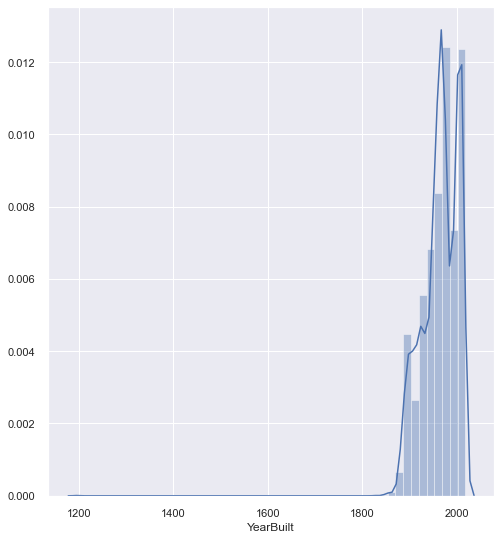

In [40]:
sns.set(rc={'figure.figsize':(8,9)})
sns.distplot(df['YearBuilt'])
plt.show()

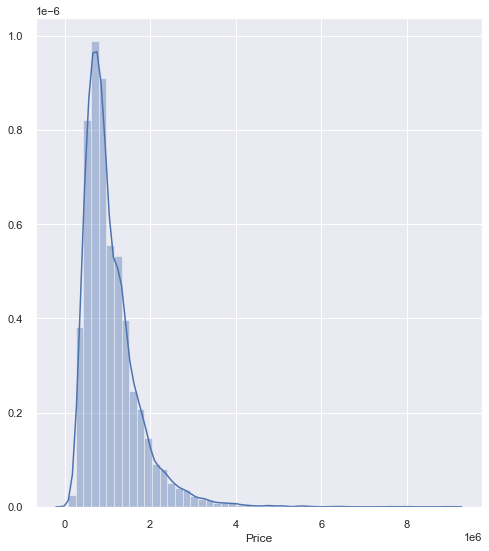

In [41]:
sns.set(rc={'figure.figsize':(8,9)})
sns.distplot(df['Price'])
plt.show()

In [48]:
avgyear = df.groupby('YearBuilt').mean()
avg_year = avgyear.reset_index()
avg_year

,YearBuilt,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount
0,1196.0,3.000000,1.200000e+06,14.200000,3149.000000,3.000000,1.000000,4.000000,807.000000,117.000000,-37.867880,145.121210,13366.000000
1,1830.0,2.000000,8.550000e+05,1.600000,3066.000000,2.000000,1.000000,1.000000,2886.000000,122.000000,-37.804200,144.984500,4553.000000
2,1850.0,2.500000,1.179500e+06,3.700000,3137.250000,2.500000,1.750000,1.250000,36.750000,82.666667,-37.831400,144.986100,10432.750000
3,1854.0,4.000000,3.310000e+06,1.600000,3065.000000,4.000000,4.000000,2.000000,337.000000,291.000000,-37.805200,144.973900,5825.000000
4,1856.0,4.000000,2.260000e+06,2.100000,3205.000000,5.000000,3.000000,0.000000,190.000000,232.000000,-37.837700,144.965300,5943.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2014.0,2.900000,9.219150e+05,10.166000,3089.120000,2.890000,1.950000,1.580000,273.260000,144.662921,-37.796341,144.974806,8713.220000
140,2015.0,3.276923,1.231485e+06,10.669231,3108.615385,3.200000,2.261538,1.646154,446.200000,195.558333,-37.796393,144.986468,6800.446154
141,2016.0,3.500000,1.523655e+06,9.793103,3096.189655,3.534483,2.534483,1.706897,425.517241,226.701754,-37.803666,144.997946,6746.706897
142,2017.0,3.444444,1.037972e+06,9.916667,3058.333333,3.555556,2.444444,1.666667,510.777778,203.687500,-37.784944,144.939537,6145.277778


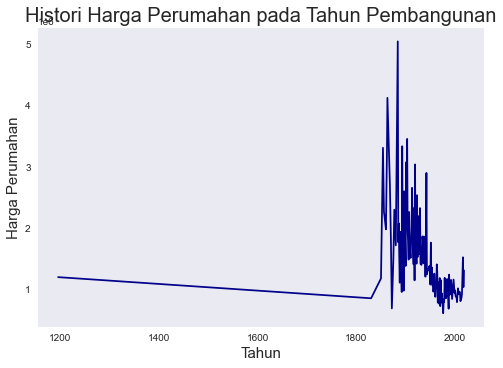

<Figure size 576x396 with 0 Axes>

In [58]:
x = avg_year['YearBuilt']
y = avg_year['Price']
plt.plot(x, y, 'darkblue')
plt.title('Histori Harga Perumahan pada Tahun Pembangunan', size=20)
plt.xlabel('Tahun', size=15)
plt.ylabel('Harga Perumahan', size=15)
plt.grid()
plt.show()
plt.savefig('grafik.png')

## Pada Grafik di atas terlihat bahwa:

- Rata-rata harga perumahan terhadap tahun pembuatannya adalah relatif menurun pada range tahun 1200 - 1800
- Kemudian harga perumahan relatif bergerak naik mulai dari tahun 1800-an dan mengalami fluktuasi naik turun sampai dengan tahun 1900-an
- Kemudian harga perumahan mulai mengalami penurunan pada awal tahun 2000 dan cenderung statis sampai mengalami kenaikan, sampai dengan tahun saat ini
- Harga perumahan/properti mengalami harga tertinggi pada sekitar ahir tahun 1800-an atau awal 1900-an. Hal ini menunjukkan Perusahaan Real Estate mengalami bisnis yang meningkat pesat dikarenakan demand dari adanya perumahan/properti tersebut banyak.


## SOAL 5
Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [60]:
dfl = df[['Price', 'Landsize', 'Distance', 'Rooms']]
dfl.head()

,Price,Landsize,Distance,Rooms
0,1480000.0,202.0,2.5,2
1,1035000.0,156.0,2.5,2
2,1465000.0,134.0,2.5,3
3,850000.0,94.0,2.5,3
4,1600000.0,120.0,2.5,4


In [54]:
dfl.corr()

,Price,Landsize,Distance,Rooms
Price,1.000000,0.037507,-0.162522,0.496634
Landsize,0.037507,1.000000,0.025004,0.025678
Distance,-0.162522,0.025004,1.000000,0.294203
Rooms,0.496634,0.025678,0.294203,1.000000


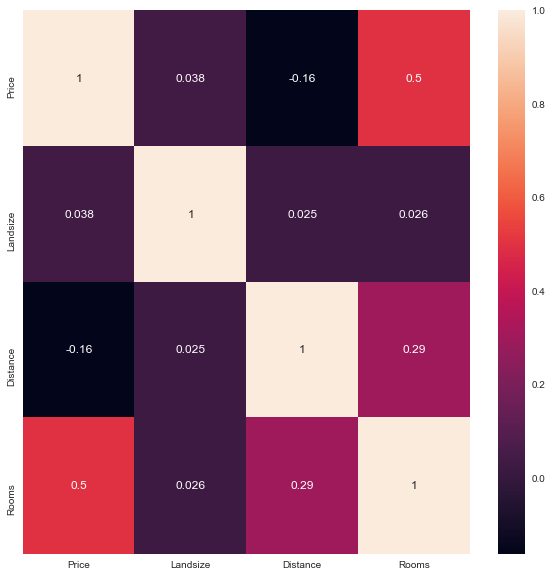

<Figure size 576x396 with 0 Axes>

In [61]:
plt.figure(figsize = (10,10))
sns.heatmap(dfl.corr('pearson'), annot = True)
plt.show()
plt.savefig('heatmap.png')

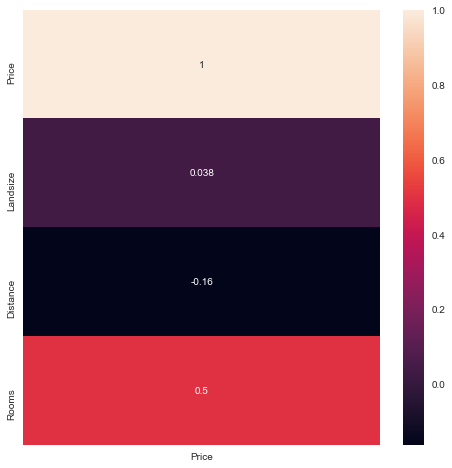

In [57]:
plt.figure(figsize = (8,8))
sns.heatmap(dfl.corr('pearson')[['Price']], annot = True)
plt.show()

- Berdasarkan data di atas, terlihat korelasi antara Rooms dan Price memiliki koefisien tertinggi, yaitu sebesar 0.50
- Hal ini menunjukkan di antara Landsize, Distance, dan Rooms, Rooms memiliki korelasi yang cukup kuat terhadap price-nya
- Begitu pun sebaliknya, price juga memiliki korelasi yang cukup kuat terhadap Rooms-nya
- Artinya, Rooms memiliki korelasi positif terhadap Price
- **Yang dapat diartikan semakin banyak jumlah Rooms/kamar di dalam suatu rumah pada suatu Real Estate, semakin tinggi price/harga rumah/perumahan tersebut, semakin kecil jumlah rooms/kamar di dalam suatu rumah yang dijual perusahaan real estate, semakin kecil pula harga jualnya**

- Sehingga, jika Perusahaan Real Estate ingin menambahkan profit atau penjualan perumahan, perlu dan harus **memperhatikan yang pertama adalah Jumlah Kamar/Room, kemudian ukuran/ luas tanah tersebut untuk menentukan harga yang sesuai**.

- Hal yang harus dilakukan oleh perusahaan Real Estate adalah melakukan riset:
    1. Lokasi: Perusahaan Real Estate harus menentukan lokasi mana yang paling tepat untuk menjual perumahan/cluster dengan memperhatikan daya beli masyarakat di lokasi tersebut.
    2. People: Perusahaan harus menentukan target sasaran yang tepat untuk menjual perumahan
    3. Price: Setelah menentukan lokasi dan target yang tepat, perusahaan tentu harus mempertimbangkan harga jual pada lokasi atau wilayah tertentu
    4. Pemasaran/Promosi: Setelah menentukan lokasi, harga, dan sasaran customer yang tepat (misal pekerja kantoran di wilayah kota), perusahaan melakukan promosi penjualan (misal memasang iklan) untuk mempromosikan perumahan tersebut.